# Zipline Backtest and Pyfolio Tearsheet with `up_minus_down.py` algo

*This example notebook is part of QuantRocket's [Getting Started with Equities](https://www.quantrocket.com/tutorials/equities/) tutorial series.*

*The notebook assumes that you've already created a historical price database called "demo-stocks-1d". Please refer to the tutorial series if you haven't completed this step.*

This notebook shows how to run a Zipline backtest using QuantRocket then analyze the backtests results inside the notebook using pyfolio.

## Step 1: Ingest Historical Data into Zipline
First we ingest our history database into Zipline:

In [1]:
from quantrocket.zipline import ingest_bundle
ingest_bundle(history_db="demo-stocks-1d", calendar="NYSE")

{'msg': 'successfully ingested demo-stocks-1d bundle', 'status': 'success'}

## Step 2: Run the Algo

Next, run the backtest. We'll run the `up_minus_down.py` demo file from QuantRocket's [codeload-demo GitHub repo](https://github.com/quantrocket-llc/codeload-demo/tree/master/zipline). 

QuantRocket returns the Zipline backtest results as a CSV, which we write to a file.

(Note that the backtest runs on the zipline service/container, not inside the jupyter service/container, i.e. not in the notebook environment itself. QuantRocket's jupyter service doesn't support running Zipline backtests via the `%%zipline` extension.)

In [2]:
from quantrocket.zipline import run_algorithm
run_algorithm("up_minus_down.py", 
              bundle="demo-stocks-1d",
              start="2013-02-01", 
              end="2015-12-31",
              filepath_or_buffer="up_minus_down_results.csv")

## Step 3: Create Tear Sheet

We can easily get a pyfolio tear sheet:

In [3]:
import pyfolio as pf

/opt/conda/lib/python3.6/site-packages/empyrical/utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)


Start date,2013-02-04
End date,2015-12-31
Total months,34
,Backtest
Annual return,18.7%
Cumulative returns,64.6%
Annual volatility,14.5%
Sharpe ratio,1.26
Calmar ratio,1.14
Stability,0.59
Max drawdown,-16.4%


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.42,2014-01-30,2014-04-28,2015-08-19,405
1,7.56,2013-05-15,2013-05-28,2013-07-05,38
2,5.74,2015-10-27,2015-11-04,2015-11-10,11
3,5.23,2015-12-08,2015-12-31,NaT,NaN
4,4.83,2015-10-01,2015-10-16,2015-10-27,19


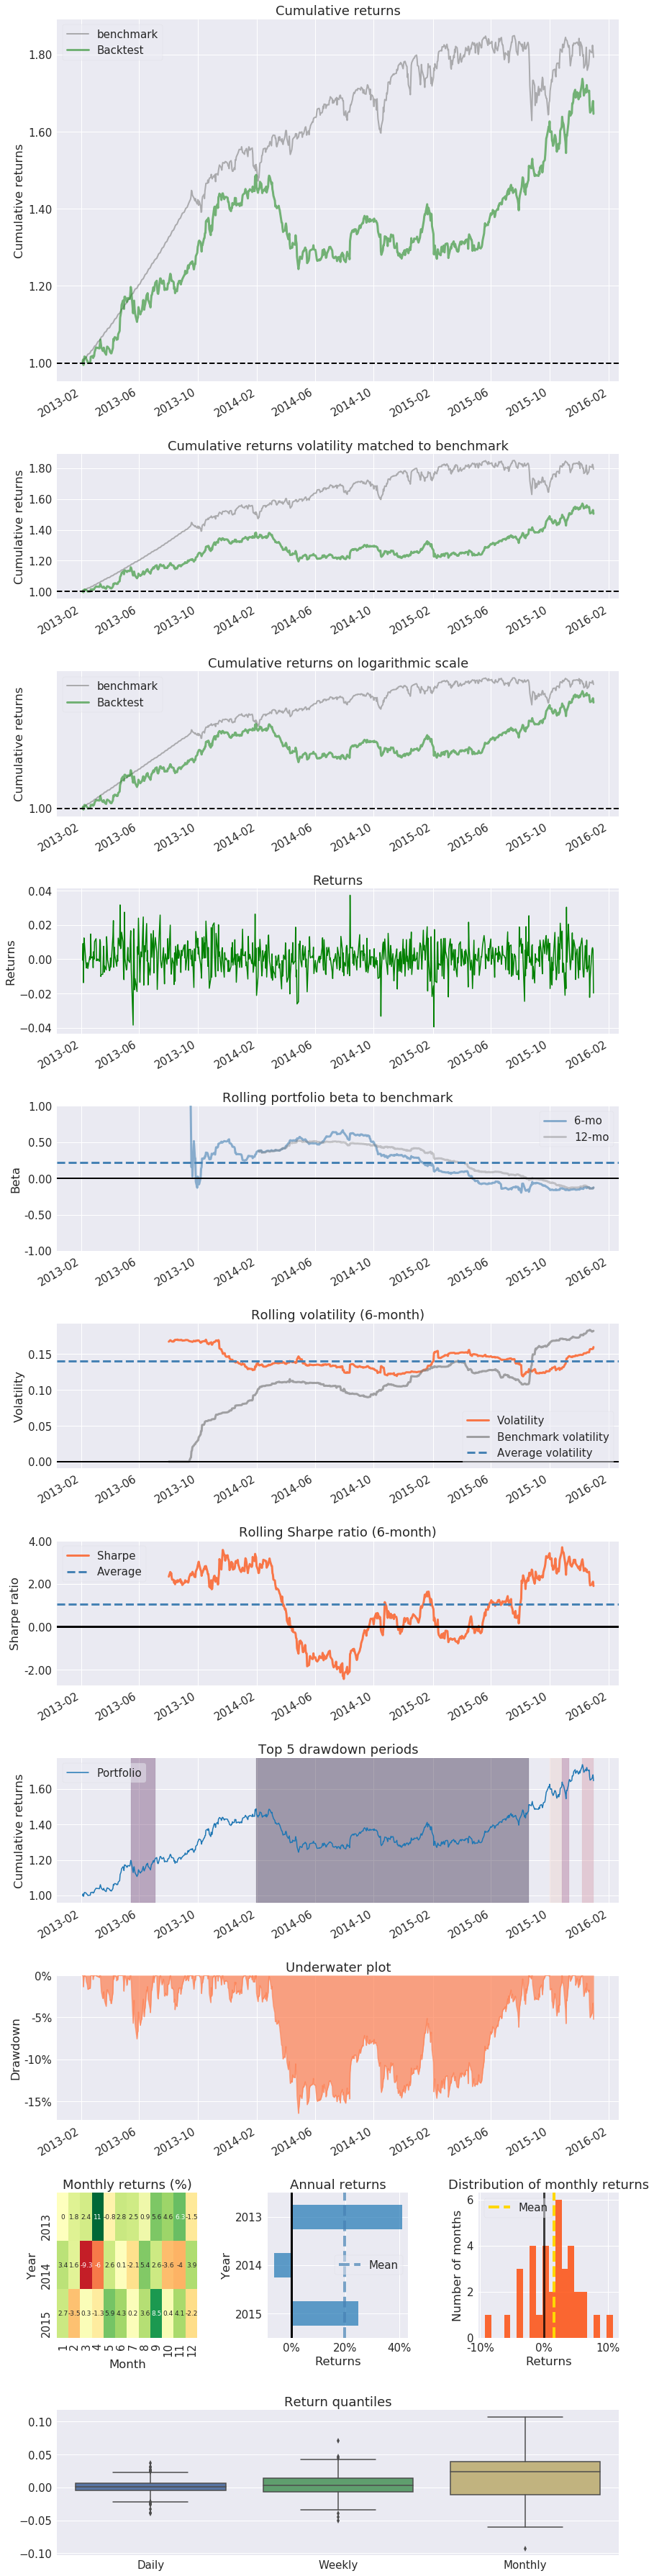

Stress Events,mean,min,max
Apr14,-0.23%,-2.61%,1.88%
Oct14,-0.15%,-3.33%,1.52%
Fall2015,0.32%,-1.39%,2.55%
New Normal,0.07%,-3.96%,3.75%


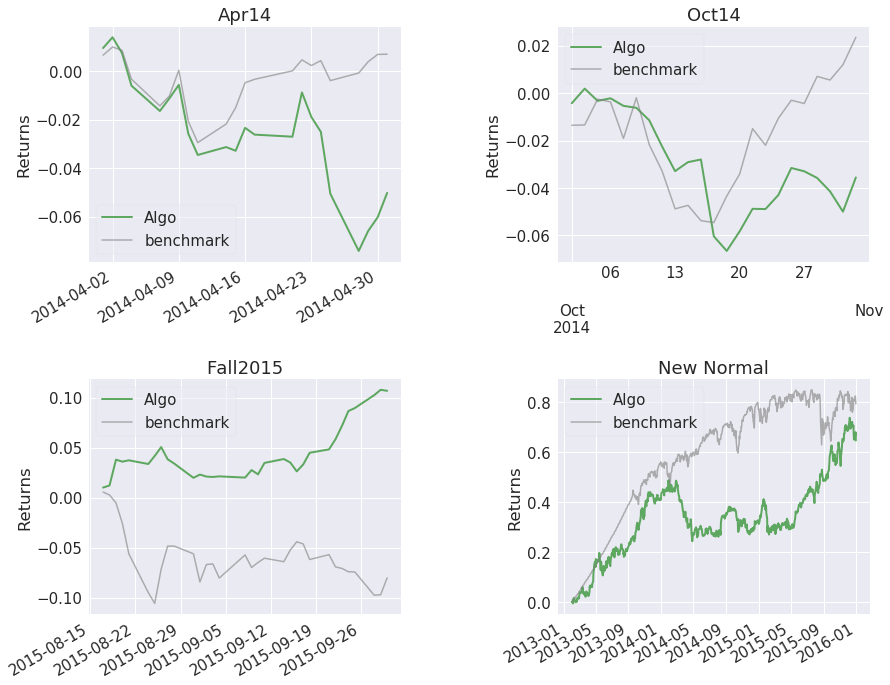

Top 10 long positions of all time,max
column,
Equity(41498671 [CSIQ]),19.70%
Equity(15124833 [NFLX]),17.24%
Equity(3691937 [AMZN]),15.49%
Equity(267892 [COKE]),15.37%
Equity(265598 [AAPL]),14.41%
Equity(274105 [SBUX]),14.11%
Equity(208813719 [GOOGL]),14.08%


Top 10 short positions of all time,max
column,
Equity(41498671 [CSIQ]),-23.48%
Equity(39927629 [EVEP]),-17.80%
Equity(208813719 [GOOGL]),-16.00%
Equity(267892 [COKE]),-15.95%
Equity(15124833 [NFLX]),-15.59%
Equity(3691937 [AMZN]),-15.51%
Equity(265598 [AAPL]),-14.95%
Equity(274105 [SBUX]),-14.42%


Top 10 positions of all time,max
column,
Equity(41498671 [CSIQ]),23.48%
Equity(39927629 [EVEP]),17.80%
Equity(15124833 [NFLX]),17.24%
Equity(208813719 [GOOGL]),16.00%
Equity(267892 [COKE]),15.95%
Equity(3691937 [AMZN]),15.51%
Equity(265598 [AAPL]),14.95%
Equity(274105 [SBUX]),14.42%


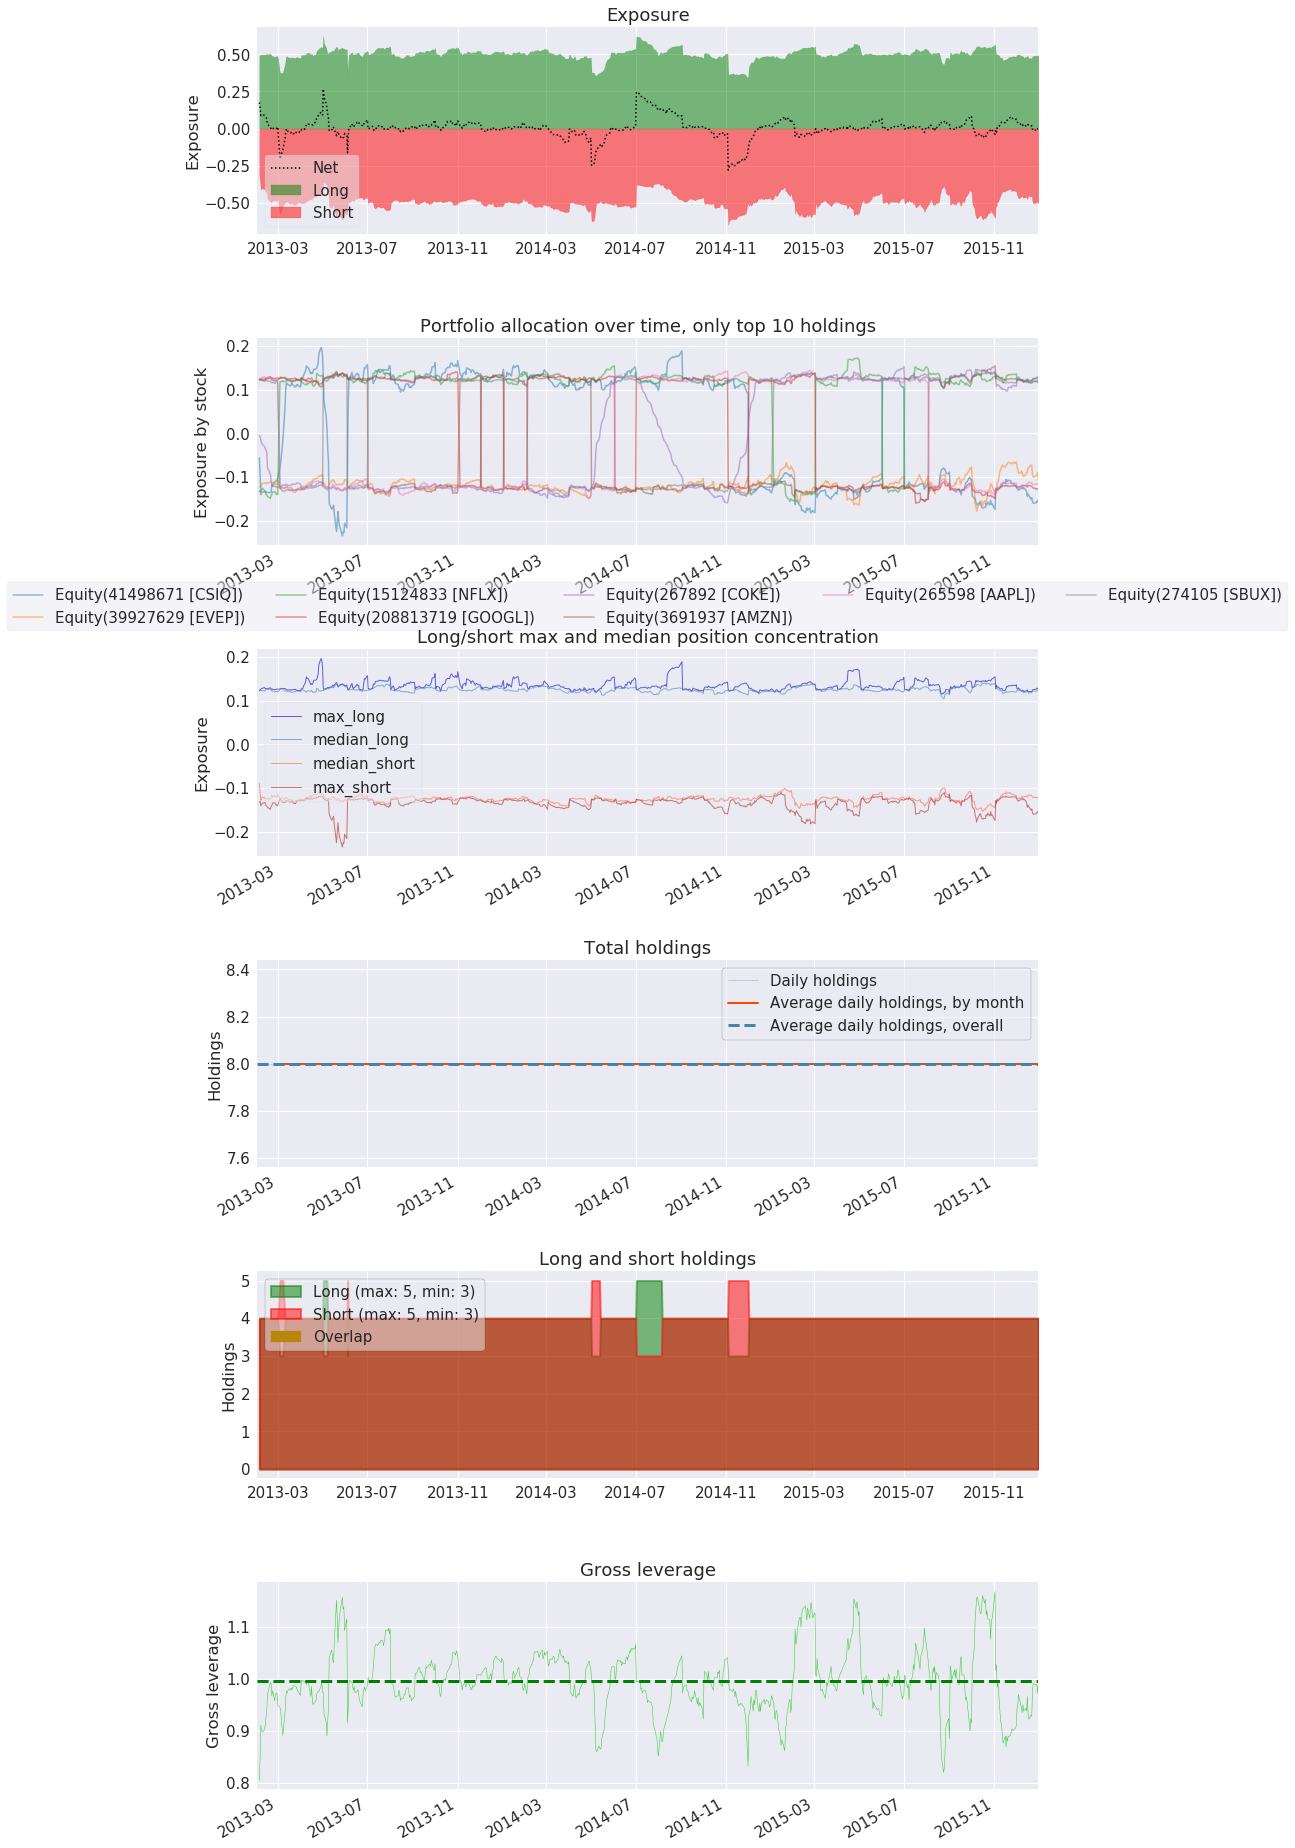

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


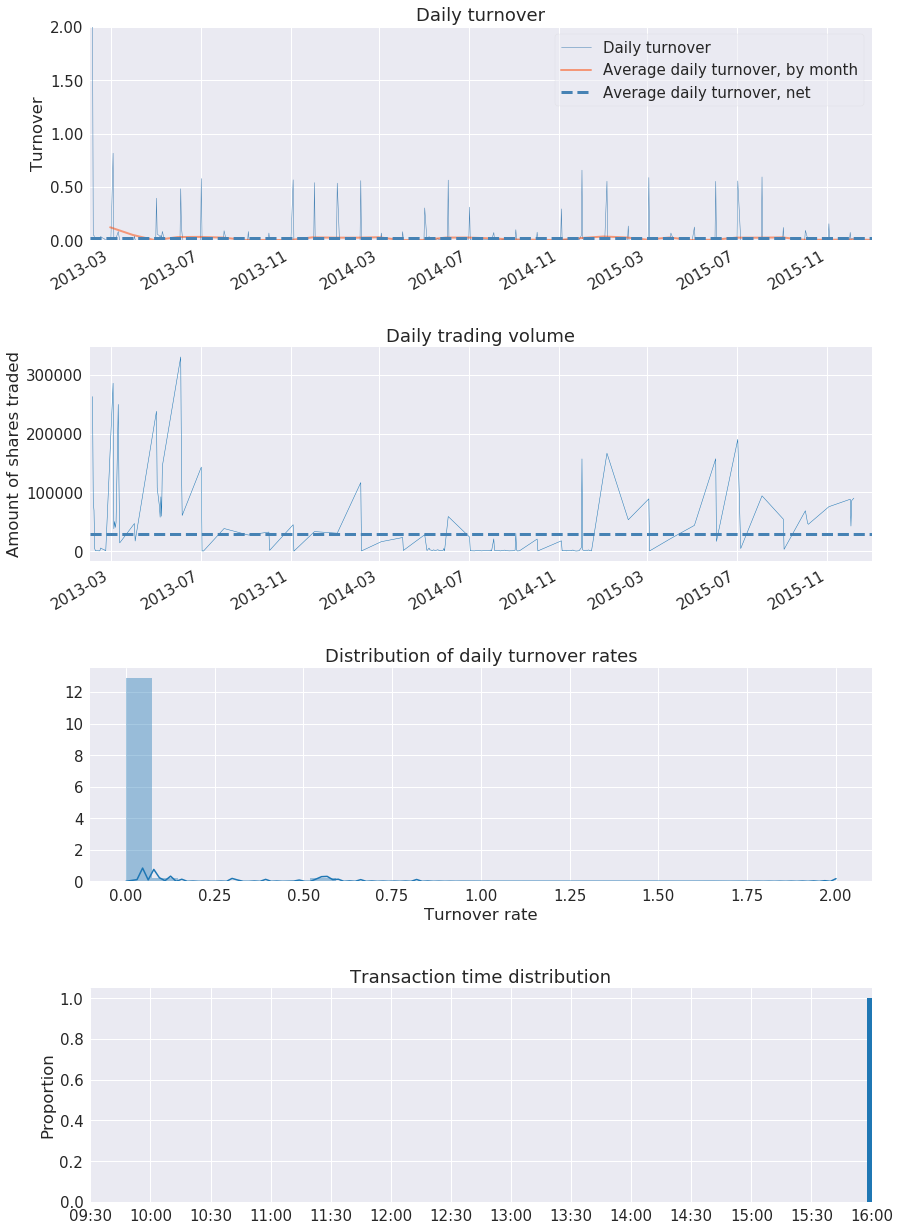

In [4]:
pf.from_zipline_csv("up_minus_down_results.csv")

## Optional: Analyze your backtest results  

The CSV result file returned by `run_algorithm` contains several DataFrames stacked into one: the Zipline performance results, plus the extracted returns, transactions, positions, and benchmark returns from those results. If you want to explore the Zipline backtest results directly, you can use the `ZiplineBacktestResult` utility class to parse the CSV and look at the `perf` DataFrame: 

In [5]:
from quantrocket.zipline import ZiplineBacktestResult
zipline_results = ZiplineBacktestResult.from_csv("up_minus_down_results.csv")
print(zipline_results.perf.head())

column                     algorithm_period_return  benchmark_period_return  \
date                                                                          
2013-02-01 00:00:00+00:00                 0.000000                 0.002249   
2013-02-04 00:00:00+00:00                -0.000534                 0.004504   
2013-02-05 00:00:00+00:00                 0.008676                 0.006763   
2013-02-06 00:00:00+00:00                -0.005138                 0.009028   
2013-02-07 00:00:00+00:00                 0.007273                 0.011297   

column                     capital_used   ending_cash  ending_exposure  \
date                                                                     
2013-02-01 00:00:00+00:00  0.000000e+00  1.000000e+07            0.000   
2013-02-04 00:00:00+00:00 -1.753509e+06  8.246491e+06      1748164.970   
2013-02-05 00:00:00+00:00  4.211021e+05  8.667593e+06      1419171.470   
2013-02-06 00:00:00+00:00  4.108097e+05  9.078403e+06       870216.442   
20